# Pendahuluan Analisis Regeresi

Beberapa hal yang akan dibahas:
- Apakah model regresi linier itu?
- Data seperti apa yang dapat digunakan pada regresi linier?
- Contoh-contoh regresi linier?<br>


Perhatikan model berikut:
<p style="text-align:center;font-size:24px">$Y=β_0+β_1X_1+...+β_pX_p+ϵ$</p>
Atau,
<p style="text-align:center;font-size:24px">$y_i=β_0+β_1x_{1i}+...+β_px_{pi}+ϵ_i ; i=1,...,n$</p>

dengan n adalah ukuran sampel.

**Apa arti dari notasi - notasi di atas?**

Perhatikan data berikut.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

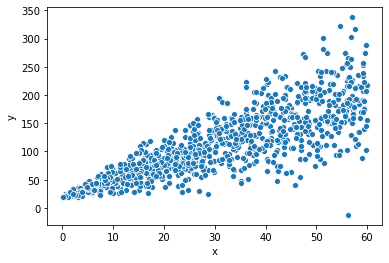

In [32]:
n = 1000
a = 20
b = 3
x = np.random.uniform(0, 60, n)
epsilon = np.random.normal(0, 1, n)
y = a+(b+epsilon)*x+epsilon
mydata = pd.DataFrame()
mydata['x'] = x
mydata['y'] = y

p1 = sns.scatterplot(data = mydata, x = 'x', y = 'y')

Sekarang, jika diambil sampel berukuran $n_1<n$ dari data di atas.

In [25]:
n1 = 0.1*n
sampel1 = mydata.sample(int(n1), random_state=10)
sampel1.describe()

,x,y
count,100.000000,100.000000
mean,31.333053,113.128778
std,18.003942,60.080461
min,0.237759,19.168781
25%,15.680012,64.215517
50%,30.235702,110.771923
75%,47.018812,155.325312
max,59.941327,274.500713


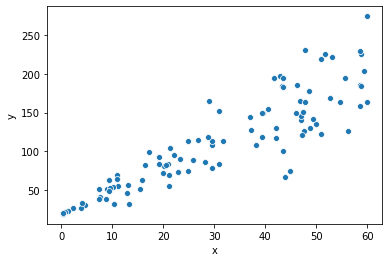

In [33]:
s1 = sns.scatterplot(data = sampel1, x = 'x', y = 'y')

Korelasi dan taksiran persamaan regresi untuk sampel tersebut adalah:

In [28]:
rho1 = np.corrcoef(sampel1.x,sampel1.y)[0,1]
rho1

0.8839658266759621

In [58]:
# Fitting model Regresi Sederhana
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm1 = smf.ols("y ~ x", data=sampel1[['y','x']]).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     350.3
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.99e-34
Time:                        10:58:31   Log-Likelihood:                -474.94
No. Observations:                 100   AIC:                             953.9
Df Residuals:                      98   BIC:                             959.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7007      5.688      3.639      0.000       9.412      31.989
x              2.9499      0.158     18.716      0.000       2.637       3.263
==============================================================================
Omnibus:                        3.400   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.716
Skew:                           0.021   Prob(JB):                        0.156
Kurtosis:                       3.943   Cond. No.                         72.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Atau dapat dituliskan:
<p style="text-align:center;font-size:24px">$\hat{y}=20.7007+2.9499x$</p>

Bagaimana jika dilakukan pengambilan sampel kembali? Sebut sampel 2.

In [30]:
n2 = 0.1*n
sampel2 = mydata.sample(int(n2), random_state=15)
sampel2.describe()

,x,y
count,100.000000,100.000000
mean,31.962594,110.832499
std,17.796716,60.463766
min,0.171819,12.435593
25%,15.863299,63.227657
50%,34.945528,102.173318
75%,48.626575,147.879079
max,59.377485,279.632667


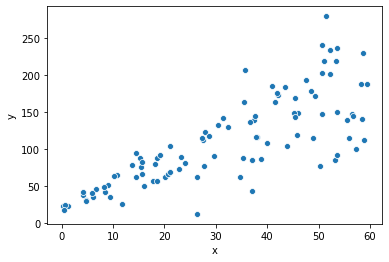

In [34]:
s2 = sns.scatterplot(data = sampel2, x = 'x', y = 'y')

Untuk memudahkan membandingkan, akan diplot kedua sampel tersebut berdampingan.

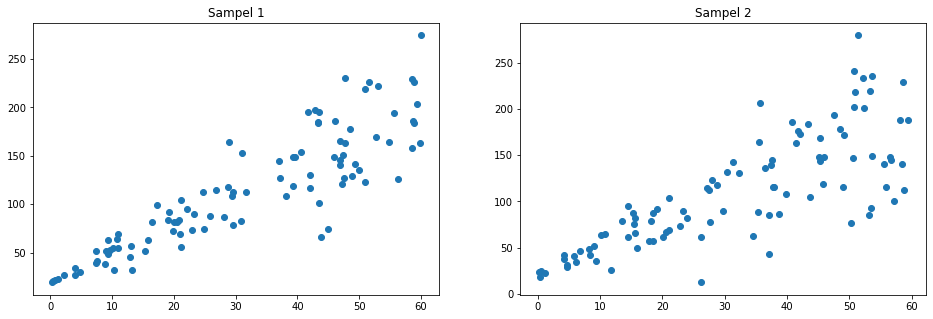

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.scatter(sampel1.x,sampel1.y)
ax1.set_title('Sampel 1')
ax2.scatter(sampel2.x,sampel2.y)
ax2.set_title('Sampel 2');


Korelasi dan taksiran persamaan regresi untuk sampel tersebut adalah:

In [46]:
rho2 = np.corrcoef(sampel2.x,sampel2.y)[0,1]
rho2

0.7866684568907251

In [59]:
# Fitting model Regresi Sederhana
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm2 = smf.ols("y ~ x", data=sampel2[['y','x']]).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.02e-22
Time:                        10:58:42   Log-Likelihood:                -503.37
No. Observations:                 100   AIC:                             1011.
Df Residuals:                      98   BIC:                             1016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4067      7.742      3.282      0.001      10.043      40.771
x              2.6727      0.212     12.614      0.000       2.252       3.093
==============================================================================
Omnibus:                        2.292   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.967
Skew:                           0.021   Prob(JB):                        0.374
Kurtosis:                       3.686   Cond. No.                         75.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Atau dapat dituliskan:
<p style="text-align:center;font-size:24px">$\hat{y}=25.4067+2.6727	x$</p>

Ingat bahwa taksiran regresi untuk data sampel 1 adalah:
<p style="text-align:center;font-size:24px">$\hat{y}=20.7007+2.9499x$</p>

Bagaimana jika dilakukan pengambilan sampel sekali lagi?

In [55]:
sampel3 = mydata[900:]
sampel3.describe()

,x,y
count,100.000000,100.000000
mean,28.692073,107.756186
std,16.774376,59.737050
min,0.051577,19.525234
25%,15.326002,56.905059
50%,28.908437,102.944766
75%,43.133814,148.684824
max,59.263493,267.109760


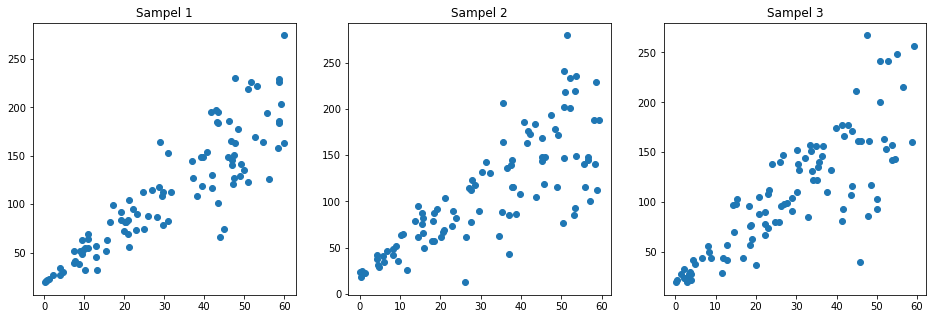

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

ax1.scatter(sampel1.x,sampel1.y)
ax1.set_title('Sampel 1')
ax2.scatter(sampel2.x,sampel2.y)
ax2.set_title('Sampel 2');
ax3.scatter(sampel3.x,sampel3.y)
ax3.set_title('Sampel 3');


In [60]:
# Fitting model Regresi Sederhana
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm3 = smf.ols("y ~ x", data=sampel3[['y','x']]).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     213.7
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.32e-26
Time:                        10:58:50   Log-Likelihood:                -492.54
No. Observations:                 100   AIC:                             989.1
Df Residuals:                      98   BIC:                             994.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1546      6.696      3.458      0.001       9.867      36.443
x              2.9486      0.202     14.617      0.000       2.548       3.349
==============================================================================
Omnibus:                        7.158   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.028   Jarque-Bera (JB):               10.527
Skew:                          -0.264   Prob(JB):                      0.00518
Kurtosis:                       4.499   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dengan taksiran persamaan regresi adalah:

Untuk sampel 1:
<p style="text-align:center;font-size:24px">$\hat{y}=25.4067+2.6727	x$</p>

Untuk sampel 2:
<p style="text-align:center;font-size:24px">$\hat{y}=20.7007+2.9499x$</p>

Untuk sampel 3:
<p style="text-align:center;font-size:24px">$\hat{y}=23.1546+2.9486x$</p>

Sementara, jika dilakukan regresi pada data populasi, akan diperoleh hasil sebagai berikut:

In [61]:
# Fitting model Regresi Sederhana
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

lm = smf.ols("y ~ x", data=mydata[['y','x']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2321.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.19e-262
Time:                        11:01:43   Log-Likelihood:                -4940.7
No. Observations:                1000   AIC:                             9885.
Df Residuals:                     998   BIC:                             9895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.0443      2.123      9.914      0.000      16.879      25.210
x              3.0057      0.062     48.175      0.000       2.883       3.128
==============================================================================
Omnibus:                       71.126   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.581
Skew:                          -0.075   Prob(JB):                     8.96e-71
Kurtosis:                       5.778   Cond. No.                         67.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

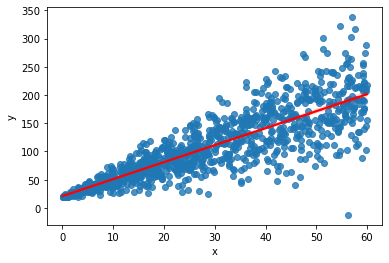

In [70]:
p = sns.regplot(mydata.x, mydata.y, line_kws={"color": "red"})

Atau dituliskan ulang sebagai berikut:

Populasi:
<p style="text-align:center;font-size:24px">$y=21.0443+3.0057	x$</p>

Sampel 1:
<p style="text-align:center;font-size:24px">$\hat{y}=25.4067+2.6727	x$</p>

Sampel 2:
<p style="text-align:center;font-size:24px">$\hat{y}=20.7007+2.9499x$</p>

Sampel 3:
<p style="text-align:center;font-size:24px">$\hat{y}=23.1546+2.9486x$</p>


**Jadi, apa yang dapat disimpulkan dari pembahasan di atas?**

Bandingkan keempat plot tersebut:

Text(0.5, 1.0, 'Sampel 3')

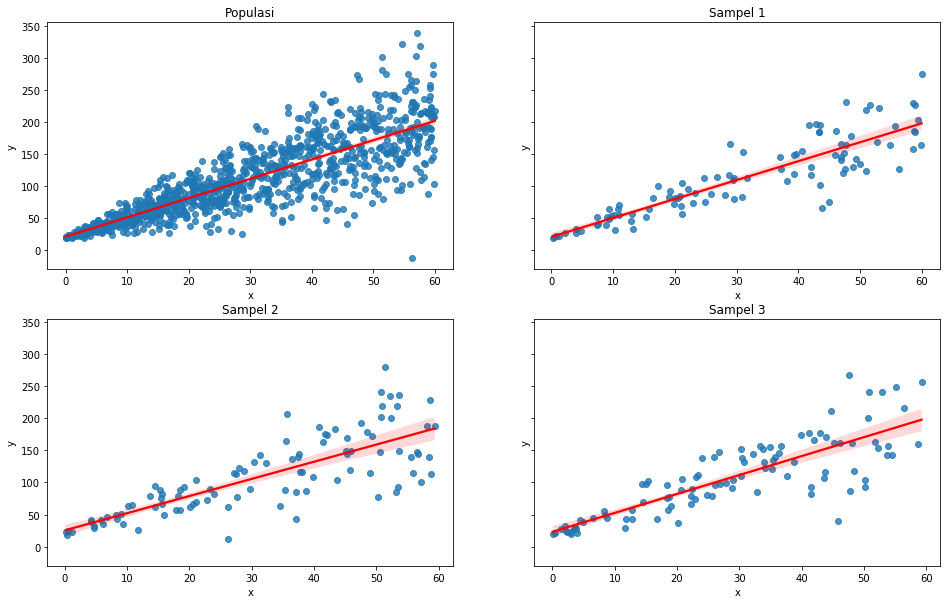

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Populasi
sns.regplot(ax=axes[0, 0], x=mydata.x, y=mydata.y, line_kws={"color": "red"})
axes[0, 0].set_title("Populasi")

# Sampel 1
sns.regplot(ax=axes[0, 1], x=sampel1.x, y=sampel1.y, line_kws={"color": "red"})
axes[0, 1].set_title("Sampel 1")

# Sampel 2
sns.regplot(ax=axes[1, 0], x=sampel2.x, y=sampel2.y, line_kws={"color": "red"})
axes[1, 0].set_title("Sampel 2")

# Sampel 3
sns.regplot(ax=axes[1, 1], x=sampel3.x, y=sampel3.y, line_kws={"color": "red"})
axes[1, 1].set_title("Sampel 3")

Jadi, apa bedanya antara model regresi:
<p style="text-align:center;font-size:24px">$Y=β_0+β_1X+ϵ$</p>

dengan taksiran persamaan regresi untuk sampel:
<p style="text-align:center;font-size:24px">$\hat{Y}=\hat{β}_0+\hat{β}_1X$  ?</p> 